In [2]:
# Read in dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
apps_with_duplicates = pd.read_csv('appdetails/App_Details_new.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()
apps['released'] = pd.to_datetime(apps['released'])
apps['year'] = pd.DatetimeIndex(apps['released']).year

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps.index))

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  602
<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          602 non-null    object        
 1   description    602 non-null    object        
 2   installs       602 non-null    object        
 3   ratings        457 non-null    float64       
 4   score          600 non-null    float64       
 5   reviews        600 non-null    float64       
 6   genre          602 non-null    object        
 7   containsAds    602 non-null    bool          
 8   appId          602 non-null    object        
 9   released       599 non-null    datetime64[ns]
 10  contentRating  602 non-null    object        
 11  free           602 non-null    bool          
 12  price          602 non-null    float64       
 13  currency       602 non-null    object        
 14  size           565 non-null    

,title,description,installs,ratings,score,reviews,genre,containsAds,appId,released,contentRating,free,price,currency,size,developer,url,year
345,Medical Formulas,Medical Formulas provides an intuitive access ...,"100,000+",1355.0,4.07,220.0,Medical,True,com.sanapps.formulasmedicas,2014-08-20,Everyone 10+,True,0.0,USD,4.4M,Sanapps Dev,https://play.google.com/store/apps/details?id=...,2014.0
460,Al-Anon Family Groups,Al‑Anon Family Groups is a mutual support prog...,"5,000+",83.0,2.27,69.0,Communication,False,org.alanon.meetings,2020-07-08,Teen,True,0.0,USD,94M,Al-Anon Family Group Headquarters Inc,https://play.google.com/store/apps/details?id=...,2020.0
484,DBT Coach: (Dialectical Behavior Therapy app),This is the most comprehensive DBT app that ex...,"50,000+",1718.0,4.90,338.0,Health & Fitness,False,co.swasth.dbtcoach,2019-02-25,Everyone,True,0.0,USD,41M,Swasth Inc.,https://play.google.com/store/apps/details?id=...,2019.0
328,AA Speakers Free (Alcoholics) - AA Audio Tapes,The AA speakers app allows you to listen to re...,"100,000+",1890.0,4.74,817.0,Lifestyle,True,com.marnistek.aaspeakersfree,2014-10-15,Teen,True,0.0,USD,NaN,Marnistek,https://play.google.com/store/apps/details?id=...,2014.0
306,IBM Micromedex Drug Ref,IBM Micromedex® Drug Reference is included fre...,"100,000+",1563.0,4.28,379.0,Medical,False,com.truven.druginfonative.customer,2014-05-28,Everyone,True,0.0,USD,17M,Mobile Micromedex,https://play.google.com/store/apps/details?id=...,2014.0


In [4]:
# List of characters to remove
chars_to_remove = ['+', ',', '$','nan','M','NaN']
# List of column names to clean
cols_to_clean = ['installs','price','size','ratings','reviews','score']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

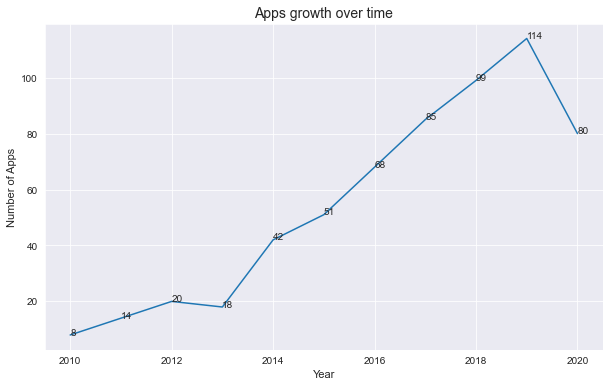

In [5]:
plt.figure(figsize=(10,6))
count = apps.groupby(['year']).size()
ax = count.plot.line()

for i, j in count.items():
    ax.annotate(str(j), xy=(i, j))
        
plt.title('Apps growth over time', fontsize=14)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Apps', fontsize=11)
plt.show()

In [6]:
num_categories = len(apps['genre'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['genre'].value_counts().sort_values(ascending = False)

data = [go.Bar( x = num_apps_in_category.index, # index = category name 
               y = num_apps_in_category.values, # value = count 
              )]
#data.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#data.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

plotly.offline.iplot(data)

Number of categories =  14


In [7]:
# Average rating of apps
avg_app_rating = apps['score'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['score']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 300,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  3.2238166666666674


Text(29.125, 0.5, 'Number of Installs (in 100,000s)')

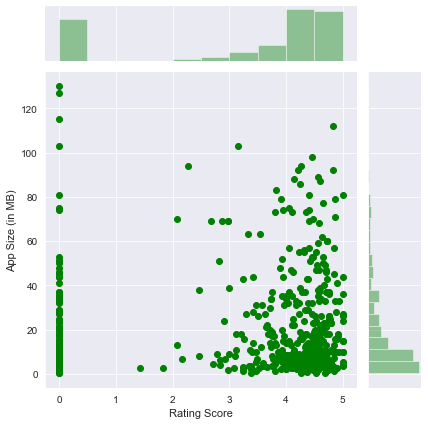

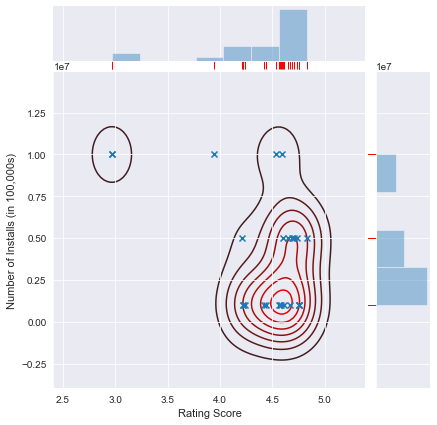

In [15]:
# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['score'].isnull()) & (~apps['size'].isnull())]

# Subset for categories with at least 250 apps
large_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['size'] <= 150]

# Plot size vs. rating score
plt1 = sns.jointplot(x = large_apps['score'], y = large_apps['size'], kind='scatter', color='g')
plt1.ax_joint.set_xlabel('Rating Score', fontsize=11)
plt1.ax_joint.set_ylabel('App Size (in MB)', fontsize=11)

# Subset apps whose 'installs > 1 M'
freq_apps = apps_with_size_and_rating_present[(apps_with_size_and_rating_present['installs'] >= 1000000) & (apps_with_size_and_rating_present['installs'] <= 10000000)]

# Plot installs vs. rating score
plt2 = sns.jointplot(x = freq_apps['score'], y = freq_apps['installs'], marker = 'x')
plt2.plot_joint(sns.kdeplot, color="r", zorder=0, levels=8)
plt2.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt2.ax_joint.set_xlabel('Rating Score', fontsize=11)
plt2.ax_joint.set_ylabel('Number of Installs (in 100,000s)', fontsize=11)

,genre,title,contentRating,installs
120,Health & Fitness,"Calm - Meditate, Sleep, Relax",Everyone,10000000
121,Education,Pepi Hospital,Everyone,10000000
122,Health & Fitness,"Calm - Meditate, Sleep, Relax",Everyone,10000000
123,Health & Fitness,Fabulous: Daily Motivation & Habit Tracker,Everyone,10000000
124,Lifestyle,"Daylio - Diary, Journal, Mood Tracker",Everyone,10000000


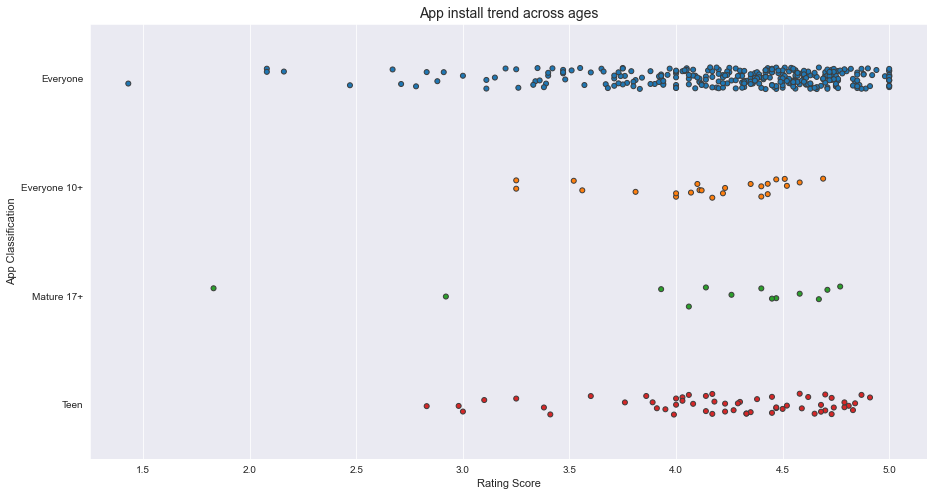

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps.groupby(apps['genre']).filter(lambda x: len(x) >= 50).reset_index()
df_plot = popular_app_cats[popular_app_cats['score'] > 0]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = df_plot['score'], y = df_plot['contentRating'], jitter=True, linewidth=1)
ax.set_xlabel('Rating Score', fontsize=11)
ax.set_ylabel('App Classification', fontsize=11)
ax.set_title('App install trend across ages', fontsize=14)

# Apps whose Price is greater than 200
apss_over_50k_install = popular_app_cats[['genre', 'title', 'contentRating', 'installs']][popular_app_cats['installs']>=10000000]
apss_over_50k_install
#freq_apps

<Figure size 720x432 with 0 Axes>

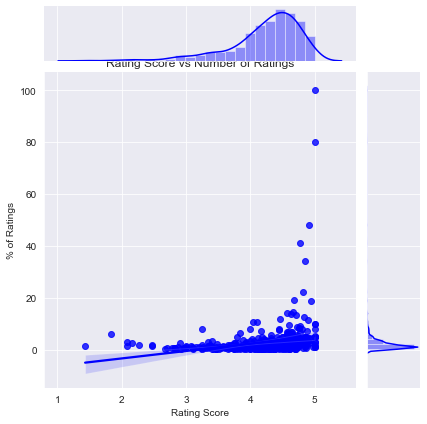

In [10]:
apps['per_raters'] = (apps['ratings']/apps['installs'])*100
apps['per_raters'] = np.where(apps['per_raters']=='NaN', 0, apps['per_raters'])
#print(apps.head(5))

plt.figure(figsize=(10,6))
sns.jointplot(x = apps['score'], y = apps['per_raters'], kind='reg', color='b')
plt.title('Rating Score vs Number of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('% of Ratings')
plt.show()

In [11]:
fig = go.Figure(data=[go.Sankey( 
    node = dict( 
      thickness = 5, 
      line = dict(color = "green", width = 0.1), 
      #label = ["A", "B", "C", "D", "E", "F"], 
      color = "blue"
    ), 
    link = dict( 
          
      # indices correspond to labels 
      source = apps['developer'],  
      target = apps['genre'], 
      value = apps['installs']
  ))]) 
  
#fig.update_layout( 
#    hovermode = 'x', 
#    title="Sankey Diagram", 
#    font=dict(size = 10, color = 'green'), 
#    plot_bgcolor='blue', 
#    paper_bgcolor='yellow'
#) 
  
fig.show()